In [38]:
using PMDPs
using Test
using POMDPSimulators

using StaticArrays
using POMDPs
using MCTS, DiscreteValueIteration
using StatsBase
using Plots
using POMDPSimulators
using D3Trees
using POMDPPolicies
using POMDPLinter
using Random, RandomNumbers
using DataFrames
# using CSV
# using CSVFiles
using BSON
using POMDPSimulators

using DrWatson
using Distributions
using BeliefUpdaters

using Plots
using Latexify

using TableView
using StatsBase

ENV["COLUMNS"]=200

200

# Plan
I want to get a table at the end.


In [2]:
plot_size = ((1+sqrt(5))/2, 1).*100 .*3
label_demand = "Expected number of requests (λ)"
label_demand = "Expected demand"

"Expected demand"

In [3]:
# res = DrWatson.collect_results(joinpath(datadir(), "results", "linear_problem"));

In [31]:
res_folder = joinpath(datadir(), "results", "test", "linear_problem")
res_files = readdir(res_folder)
    
res = BSON.load(joinpath(res_folder,res_files[2]))
for r in res_files
    println(r)
end

fhvi_N=10_T=10_c=3_expected_res=3_nᵣ=3_objective=revenue_res_budget_μ=5.bson
fhvi_N=10_T=10_c=3_expected_res=3_nᵣ=3_objective=utilization_res_budget_μ=5.bson
flatrate_N=10_T=10_c=3_expected_res=3_nᵣ=3_objective=revenue_res_budget_μ=5.bson
flatrate_N=10_T=10_c=3_expected_res=3_nᵣ=3_objective=utilization_res_budget_μ=5.bson
hindsight_N=10_T=10_c=3_expected_res=3_nᵣ=3_objective=revenue_res_budget_μ=5.bson
hindsight_N=10_T=10_c=3_expected_res=3_nᵣ=3_objective=utilization_res_budget_μ=5.bson
mctsdpw_N=10_T=10_c=3_expected_res=3_nᵣ=3_objective=revenue_res_budget_μ=5.bson
mctsdpw_N=10_T=10_c=3_expected_res=3_nᵣ=3_objective=utilization_res_budget_μ=5.bson
mctsvanilla_N=10_T=10_c=3_expected_res=3_nᵣ=3_objective=revenue_res_budget_μ=5.bson
mctsvanilla_N=10_T=10_c=3_expected_res=3_nᵣ=3_objective=utilization_res_budget_μ=5.bson
vi_N=10_T=10_c=3_expected_res=3_nᵣ=3_objective=revenue_res_budget_μ=5.bson
vi_N=10_T=10_c=3_expected_res=3_nᵣ=3_objective=utilization_res_budget_μ=5.bson


In [32]:
function res2row(res)
    row_dfs = []
    
    # process pp_params into df with single row
    row = DataFrame(res[:pp_params])
    push!(row_dfs, row)
    
    # process agg: move evry row from "description" into single dataframe of one row
    agg = select(res[:agg], [:variable, :mean, :median, :min, :max])
    for row in eachrow(agg)
        v = string(row.variable)
        row = DataFrame(row[2:end])
        rename!(s-> s*"_$v", row)
        push!(row_dfs, row)
    end
    
    # compact dfs into single row
    df = hcat(row_dfs...)
    
    # add method
    method = string(first(res[:results]).name)*"_"*res[:method_info]
    insertcols!(df, 1, :method=>method)
    
    # add objective
    if haskey(res[:pp_params], :objective)
        objective = string(res[:pp_params][:objective])
    else
        objective = :revenue
    end
    if !("objective" in names(df))
#         df.objective = objective
        insertcols!(df, 2, :objective=>objective)
    end
    
    # add n_traces
    insertcols!(df, 2, :N=>res[:N])
end

# res_folder = joinpath(datadir(), "results", "graph_problem")
# res_files = readdir(res_folder)
    
# res = BSON.load(joinpath(res_folder,res_files[1]))

# res2row(res)

res2row (generic function with 1 method)

## Linear problems

In [61]:
?getfield

search: getfield



```
getfield(value, name::Symbol)
getfield(value, i::Int)
```

Extract a field from a composite `value` by name or position. See also [`getproperty`](@ref Base.getproperty) and [`fieldnames`](@ref).

# Examples

```jldoctest
julia> a = 1//2
1//2

julia> getfield(a, :num)
1

julia> a.num
1

julia> getfield(a, 1)
1
```


In [64]:
res = BSON.load(joinpath(res_folder,res_files[7]))
s = res[:kwargs][:mcts_solver]
Dict([fn=>getfield(s, fn) for fn in fieldnames(typeof(s))])
# s.depth

Dict{Symbol,Any} with 22 entries:
  :n_iterations         => 100
  :check_repeat_action  => true
  :max_time             => 1.0
  :k_action             => 10.0
  :keep_tree            => true
  :check_repeat_state   => true
  :tree_in_info         => false
  :alpha_action         => 0.5
  :exploration_constant => 40.0
  :show_progress        => false
  :default_action       => ExceptionRethrow()
  :rng                  => Xorshift128Plus(0x8b580c4f7bf31cd7, 0x5b05aab05350b0f1)
  :k_state              => 10.0
  :alpha_state          => 0.5
  :enable_action_pw     => true
  :init_N               => 0
  :estimate_value       => RolloutEstimator(RandomSolver(Xorshift128Plus(0x8b580c4f7bf31cd7, 0x5b05aab05350b0f1)))
  :reset_callback       => #9
  :next_action          => RandomActionGenerator{Xorshift128Plus}(Xorshift128Plus(0x8b580c4f7bf31cd7, 0x5b05aab05350b0f1))
  :depth                => 50
  :enable_state_pw      => false
  :init_Q               => 0.0

In [40]:
res_folder = joinpath(datadir(), "results", "test", "linear_problem")
res_files = readdir(res_folder)

rows = []
for res_file in res_files
    if res_file[end-4:end]==".bson"
        res = BSON.load(joinpath(res_folder,res_file))
#         display(res_file)
#         display(res)
        row = res2row(res)
#         display(row)
        push!(rows, row)
    end
end

results = vcat(rows...);
# sort!(results, [:method, :expected_res]);

In [37]:
results

,method,N,T,c,res_budget_μ,objective,nᵣ,expected_res,mean_r,median_r,min_r,max_r,mean_u,median_u,min_u,max_u,mean_nₛ,median_nₛ,min_nₛ,max_nₛ,mean_nᵣ,median_nᵣ
,String,Int64,Int64,Int64,Float64,Symbol,Int64,Float64,Float64,Float64,Any,Any,Float64,Float64,Any,Any,Float64,Float64,Any,Any,Float64,Float64
1,fhvi_,10,10,3,5.0,revenue,3,3.0,10.25,8.75,0.0,22.5,2.4,2.0,0,5,1.6,1.5,0,4,2.8,2.0
2,fhvi_,10,10,3,5.0,utilization,3,3.0,3.6,3.0,1.0,8.0,3.6,3.0,1,8,2.4,2.0,1,6,2.8,2.0
3,flatrate_,10,10,3,5.0,revenue,3,3.0,8.0,7.5,0.0,20.0,2.4,2.0,0,5,1.6,1.5,0,4,2.8,2.0
4,flatrate_,10,10,3,5.0,utilization,3,3.0,3.3,3.0,0.0,7.0,3.3,3.0,0,7,2.1,2.0,0,5,2.8,2.0
5,hindsight_,10,10,3,5.0,revenue,3,3.0,13.5,10.0,5.0,32.5,2.8,2.5,1,6,1.9,2.0,1,4,2.8,2.0
6,hindsight_,10,10,3,5.0,utilization,3,3.0,3.6,3.0,1.0,8.0,3.6,3.0,1,8,2.4,2.0,1,6,2.8,2.0
7,mcts_dpw,10,10,3,5.0,revenue,3,3.0,8.75,6.25,0.0,27.5,2.0,1.5,0,5,1.4,1.5,0,4,2.8,2.0
8,mcts_dpw,10,10,3,5.0,utilization,3,3.0,3.1,2.5,0.0,8.0,3.1,2.5,0,8,2.1,2.0,0,6,2.8,2.0
9,mcts_vanilla,10,10,3,5.0,revenue,3,3.0,9.25,6.25,2.5,20.0,2.4,2.0,1,5,1.6,1.0,1,4,2.8,2.0


In [36]:
df10 = filter(:N => N->N==10, results)
gps = groupby(df10, [:objective])

restable = outerjoin([select(gr, [:method, :N, :objective, :mean_r, :mean_u]) for gr in gps]...; on=[:method, :N], makeunique=true)
restable = restable[[2,4,5,6,1,3], :]

,method,N,objective,mean_r,mean_u,objective_1,mean_r_1,mean_u_1
,String?,Int64?,Symbol?,Float64?,Float64?,Symbol?,Float64?,Float64?
1,flatrate_,10,revenue,8.0,2.4,utilization,3.3,3.3
2,mcts_dpw,10,revenue,8.75,2.0,utilization,3.1,3.1
3,mcts_vanilla,10,revenue,9.25,2.4,utilization,3.6,3.6
4,vi_,10,revenue,10.25,2.4,utilization,3.6,3.6
5,fhvi_,10,revenue,10.25,2.4,utilization,3.6,3.6
6,hindsight_,10,revenue,13.5,2.8,utilization,3.6,3.6


In [16]:
df10 = filter(:N => N->N==10, results)
# df10 = results
gps = groupby(df10, [:T, :c, :nᵣ])

restable = outerjoin([select(gr, [:method, :N, :objective, :mean_r, :mean_u]) for gr in gps]...; on=[:method, :N, :objective], makeunique=true)
# restable = restable[[1,4,3,5,2], :]
restable = coalesce.(restable, 0) # replace missing values with 0

LoadError: MethodError: no method matching outerjoin(::DataFrame; on=[:method, :N, :objective], makeunique=true)
Closest candidates are:
  outerjoin(::AbstractDataFrame, !Matched::AbstractDataFrame; on, makeunique, indicator, validate, renamecols, matchmissing) at /home/mrkos/.julia/packages/DataFrames/oQ5c7/src/abstractdataframe/join.jl:997
  outerjoin(::AbstractDataFrame, !Matched::AbstractDataFrame, !Matched::AbstractDataFrame...; on, makeunique, validate, matchmissing) at /home/mrkos/.julia/packages/DataFrames/oQ5c7/src/abstractdataframe/join.jl:1015

In [70]:
latexify(restable; env=:tabular)

L"\begin{tabular}{ccccc}
$method$ & $mean_{r}$ & $mean_{r\_1}$ & $mean_{r\_2}$ & $mean_{r\_3}$\\
$flatrate_{}$ & $6.75$ & $91.5$ & $883.5$ & $4092.0$\\
$mcts_{vanilla}$ & $4.75$ & $154.75$ & $1172.25$ & $5450.5$\\
$mcts_{dpw}$ & $7.5$ & $151.0$ & $1208.0$ & $5470.75$\\
$vi_{}$ & $8.0$ & $0.0$ & $0.0$ & $0.0$\\
$hindsight_{}$ & $12.25$ & $227.5$ & $1930.25$ & $9056.25$\\
\end{tabular}
"

## Graph problems

In [170]:
res_folder = joinpath(datadir(), "results", "individual", "graph_problem")
res_files = readdir(res_folder)
rows = []
for res_file in res_files
    if res_file[end-4:end]==".bson"
        res = BSON.load(joinpath(res_folder,res_file))
        row = res2row(res)
        push!(rows, row)
    end
end

results = vcat(rows...);
sort!(results, [:method, :expected_res]);

results

,method,N,NE,NP,NV,T,c,expected_res,objective,res_budget_μ,seed,mean_r,median_r,min_r,max_r,mean_u,median_u,min_u,max_u,mean_nₛ,median_nₛ,min_nₛ
,String,Int64,Int64,Int64,Int64,Int64,Int64,Float64,Symbol,Float64,Int64,Float64,Float64,Any,Any,Float64,Float64,Any,Any,Float64,Float64,Any
1,flatrate_,100,8,20,5,100,5,80.0,utilization,5.0,1,74.3,70.0,50.0,100.0,21.07,21.0,15,26,7.43,7.0,5
2,flatrate_,10,8,20,5,100,5,80.0,utilization,5.0,1,81.0,80.0,60.0,100.0,23.0,24.0,19,24,8.1,8.0,6
3,flatrate_,10,8,20,5,100,5,80.0,revenue,5.0,1,79.0,80.0,60.0,100.0,22.5,23.0,19,25,7.9,8.0,6
4,flatrate_,10,20,50,8,1000,10,400.0,utilization,5.0,1,418.5,412.5,390.0,480.0,118.2,118.0,104,131,27.9,27.5,26
5,flatrate_,10,20,50,8,1000,10,400.0,revenue,5.0,1,421.5,412.5,390.0,480.0,118.5,118.0,104,134,28.1,27.5,26
6,flatrate_,10,30,100,15,1000,10,600.0,utilization,5.0,1,462.5,456.25,387.5,525.0,135.4,137.0,117,152,37.0,36.5,31
7,flatrate_,10,30,100,15,1000,10,600.0,revenue,5.0,1,461.25,456.25,387.5,525.0,135.1,137.0,117,152,36.9,36.5,31
8,flatrate_,10,45,100,30,1000,10,900.0,utilization,5.0,1,717.0,712.5,645.0,855.0,226.0,230.5,199,247,47.8,47.5,43
9,flatrate_,10,45,100,30,1000,10,900.0,revenue,5.0,1,711.0,705.0,645.0,855.0,224.5,227.5,199,248,47.4,47.0,43


In [173]:
df10 = filter(:N => N->N==10, results)
gps = groupby(df10, [:T, :c, :NE, :NV])

# gr = gps[1]
# gr[!, :mean_r]
restable = outerjoin([select(gr, [:method, :N, :objective, :mean_r, :mean_u]) for gr in gps]...; on=[:method, :N, :objective], makeunique=true)
# restable = restable[[1,4,3,2], :]

# latexify(restable; env=:tabular)

,method,N,objective,mean_r,mean_u,mean_r_1,mean_u_1,mean_r_2,mean_u_2,mean_r_3,mean_u_3
,String?,Int64?,Symbol?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?
1,flatrate_,10,utilization,81.0,23.0,418.5,118.2,462.5,135.4,717.0,226.0
2,flatrate_,10,revenue,79.0,22.5,421.5,118.5,461.25,135.1,711.0,224.5
3,hindsight_,10,utilization,154.0,29.2,771.0,155.9,907.25,180.5,1478.5,294.3
4,mcts_dpw,10,utilization,101.75,23.8,465.25,122.9,519.75,137.1,873.25,232.3
5,mcts_vanilla,10,utilization,99.25,24.7,453.75,124.1,528.75,145.2,839.5,235.5


## Bus problems

In [134]:
res_folder = joinpath(datadir(), "results", "individual", "bus_problem")
res_files = readdir(res_folder)
rows = []
for res_file in res_files
    if res_file[end-4:end]==".bson"
        res = BSON.load(joinpath(res_folder,res_file))
        row = res2row(res)
        push!(rows, row)
    end
end

results = vcat(rows...);
sort!(results, [:method, :expected_requests]);

results

,method,N,T,c,expected_requests,nᵣ,objective,res_budget_μ,mean_r,median_r,min_r,max_r,mean_u,median_u,min_u,max_u,mean_nₛ,median_nₛ,min_nₛ,max_nₛ,mean_nᵣ,median_nᵣ
,String,Int64,Int64,Int64,Int64,Int64,Symbol,Float64,Float64,Float64,Any,Any,Float64,Float64,Any,Any,Float64,Float64,Any,Any,Float64,Float64
1,flatrate_,10,1000,55,80,3,revenue,5.0,405.75,405.0,375.0,442.5,127.4,129.0,114,139,54.1,54.0,50,59,80.0,80.0
2,flatrate_,10,1000,55,80,3,revenue,5.0,408.75,408.75,382.5,442.5,128.0,131.5,114,140,54.5,54.5,51,59,80.0,80.0
3,flatrate_,10,2000,55,160,3,revenue,5.0,452.25,457.5,427.5,472.5,137.8,136.0,134,147,60.3,61.0,57,63,160.0,160.0
4,hindsight_,10,1000,55,80,3,revenue,5.0,661.5,656.25,630.0,702.5,141.3,143.0,133,147,66.9,67.0,63,69,80.0,80.0
5,hindsight_,10,1000,55,80,3,revenue,5.0,646.25,646.25,592.5,690.0,140.5,141.5,132,148,65.9,66.0,61,68,80.0,80.0
6,hindsight_,10,2000,55,160,3,revenue,5.0,851.25,851.25,807.5,875.0,163.5,165.0,157,165,72.2,72.5,67,76,159.3,160.0
7,mcts_dpw,10,1000,55,80,3,revenue,5.0,333.0,337.5,272.5,382.5,94.0,95.0,79,113,42.4,41.5,34,50,80.0,80.0
8,mcts_dpw,10,1000,55,80,3,revenue,5.0,328.0,325.0,277.5,417.5,94.6,93.0,83,111,42.0,41.0,39,48,80.0,80.0
9,mcts_dpw,10,2000,55,160,3,revenue,5.0,518.75,520.0,480.0,560.0,143.4,142.0,136,152,65.7,65.5,61,72,160.0,160.0


In [137]:
df10

,method,N,T,c,expected_requests,nᵣ,objective,res_budget_μ,mean_r,median_r,min_r,max_r,mean_u,median_u,min_u,max_u,mean_nₛ,median_nₛ,min_nₛ,max_nₛ,mean_nᵣ,median_nᵣ
,String,Int64,Int64,Int64,Int64,Int64,Symbol,Float64,Float64,Float64,Any,Any,Float64,Float64,Any,Any,Float64,Float64,Any,Any,Float64,Float64
1,flatrate_,10,2000,55,160,3,revenue,5.0,452.25,457.5,427.5,472.5,137.8,136.0,134,147,60.3,61.0,57,63,160.0,160.0
2,hindsight_,10,2000,55,160,3,revenue,5.0,851.25,851.25,807.5,875.0,163.5,165.0,157,165,72.2,72.5,67,76,159.3,160.0
3,mcts_dpw,10,2000,55,160,3,revenue,5.0,518.75,520.0,480.0,560.0,143.4,142.0,136,152,65.7,65.5,61,72,160.0,160.0
4,mcts_vanilla,10,2000,55,160,3,revenue,5.0,503.25,511.25,467.5,527.5,144.5,144.5,137,150,67.4,68.0,63,70,160.0,160.0


In [138]:
df10 = filter(:expected_requests => N->N==160, results)
gps = groupby(df10, [:T, :c])

gr = gps[1]
gr[!, :mean_r]
# restable = outerjoin([select(gr, [:method, :mean_r]) for gr in gps]...;on=:method, makeunique=true)
restable = select(df10, [:method, :mean_r])
restable = restable[[1,4,3,2], :]

display(restable)
latexify(restable; env=:tabular)

,method,mean_r
,String,Float64
1,flatrate_,452.25
2,mcts_vanilla,503.25
3,mcts_dpw,518.75
4,hindsight_,851.25


L"\begin{tabular}{cc}
$method$ & $mean_{r}$\\
$flatrate_{}$ & $452.25$\\
$mcts_{vanilla}$ & $503.25$\\
$mcts_{dpw}$ & $518.75$\\
$hindsight_{}$ & $851.25$\\
\end{tabular}
"

## plots

In [14]:
grps = groupby(results, :method);

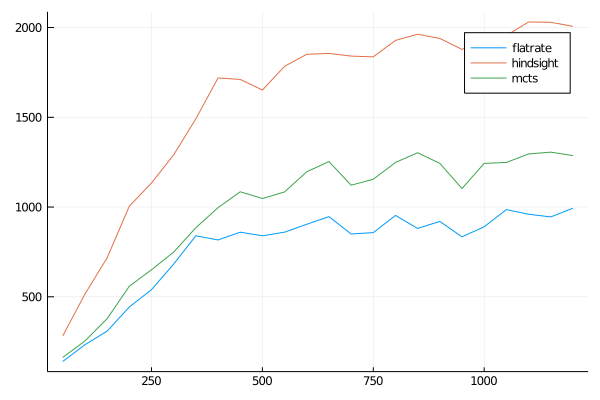

In [12]:
plot()
for gr in grps
    plot!(gr.expected_res, gr.mean_r, label=first(gr).method)
end
plot!()

In [13]:
plot(edf1[!, x_param], edf1.r_mc,
    xlabel = label_demand,
    ylabel = "Utilization",
    label = "MCTS",
    m=(3, :circle), 
    size=plot_size,
    legend=:topleft
)
plot!(edf1[!, x_param], edf1.r_vi,  m=(3, :square, :black), line=(:black), label="VI")
plot!(edf1[!, x_param], edf1.r_flat,  m=(3, :dtriangle, :red), line=(:red), label="flat-rate")
plot!(edf1[!, x_param], edf1.r_hind,  m=(3, :utriangle, :green), line=(:green), label="hindsight")


LoadError: UndefVarError: edf1 not defined